### 1:1 H+ and substrate antiporter (based on Gdx). 
#### August George 10/2/2020

In [21]:
from scipy.integrate import odeint, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [22]:
### Simulation parameters (using moles, liters, and seconds units)

p = {    
    
    "k_H_on" : 1e10,
    "k_H_off" : 1e3,  
    "k_S_on" : 1e7,  
    "k_S_off" : 5,
    "k_conf" : 10,
    "H_out_0" : 1e-7,  
    "H_in_0" : 5e-8, 
    "S_out_0" : 1e-3, 
    "S_in_0" : 2e-3,
    "OF_0" : 0,  
    "IF_0" : 0,
    "OF_Hb_0" : 1.7e-7,  
    "IF_Hb_0" : 0,
    "IF_Hb_Sb_0" : 0,
    "OF_Hb_Sb_0" : 0,
    "IF_Sb_0" : 0,
    "OF_Sb_0" : 0,
    "V" : 1e-4,
    "t_0" : 0,
    "t_f" : int(1),
    "t_n" :int(1e3)
}

p_default = p.copy()  # to reset to original parameter values later

In [31]:
### Antiporter Model 1 simulation

def sim1(p):
    '''
    input simulation parameters
    output flux
    '''
    
    def antiporter1(x, t, k_H_on, k_H_off, k_S_on, k_S_off, k_conf):
        '''
        input X(t) populations, time, and rate constants
        output dX/dt 

        '''
        
        # state conc.
        OF = x[0]
        OF_Hb = x[1]
        IF_Hb = x[2]
        IF_Hb_Sb = x[3]
        IF_Sb = x[4]
        OF_Sb = x[5]
        
        # species conc.
        H_out = x[6]
        H_in = x[7]
        S_out = x[8]
        S_in = x[9]

        # antiporter ODEs
        # OF
        d1dt = OF_Sb*k_S_off + OF_Hb*k_H_off - OF*H_out*k_H_on - OF*S_out*k_S_on
        # OF_Hb
        d2dt = OF*H_out*k_H_on + IF_Hb*k_conf - OF_Hb*k_conf - OF_Hb*k_H_off
        # IF_Hb
        d3dt = OF_Hb*k_conf + IF_Hb_Sb*k_S_off - IF_Hb*k_conf - IF_Hb*S_in*k_S_on
        # IF_Hb_Sb
        d4dt = IF_Hb*S_in*k_S_on + IF_Sb*H_in*k_H_on - IF_Hb_Sb*k_S_off - IF_Hb_Sb*k_H_off
        # IF_Sb
        d5dt = OF_Sb*k_conf + IF_Hb_Sb*k_H_off - IF_Sb*k_conf - IF_Sb*H_in*k_H_on
        # OF_Sb
        d6dt = OF*S_out*k_S_on + IF_Sb*k_conf - OF_Sb*k_conf - OF_Sb*k_S_off
        # H_out
        d7dt = OF_Hb*k_H_off - OF*H_out*k_H_on 
        # H_in
        d8dt = IF_Hb_Sb*k_H_off - IF_Sb*H_in*k_H_on 
        # S_out
        d9dt = OF_Sb*k_S_off - OF*S_out*k_S_on 
        # S_in
        d10dt = IF_Hb_Sb*k_S_off - IF_Hb*S_in*k_S_on 

        return [d1dt, d2dt, d3dt, d4dt, d5dt, d6dt, d7dt, d8dt, d9dt, d10dt]

    # list of initial values
    x_0 = [p['OF_0'], p['OF_Hb_0'], p['IF_Hb_0'], p['IF_Hb_Sb_0'], p['IF_Sb_0'], p['OF_Sb_0'], p['H_out_0'], p['H_in_0'], p['S_out_0'], p['S_in_0']]

    # ODE integration time steps
    t = np.linspace(p['t_0'],p['t_f'],p['t_n'])
    
    # ODE integration
    x = odeint(antiporter1, x_0, t, args=(p['k_H_on'], p['k_H_off'], p['k_S_on'], p['k_S_off'], p['k_conf']), rtol=1e-10, atol=1e-16)

    # integration output
    OF = x[:,0]
    OF_Hb = x[:,1]
    IF_Hb = x[:,2]
    IF_Hb_Sb = x[:,3]
    IF_Sb = x[:,4]
    OF_Sb = x[:,5]
    H_out = x[:,6]
    H_in = x[:,7]
    S_out = x[:,8]
    S_in = x[:,9]

    # flux calculation (IF_Sb + H_in --> IF_Hb_Sb)
    J_H_on = IF_Sb*H_in*k_H_on - IF_Hb_Sb*k_H_off
    
    return J_H_on

In [36]:
### Antiporter Model 2 simulation

def sim2(p):
    '''
    input simulation parameters
    output flux    
    '''
    
    def antiporter2(x, t, k_H_on, k_H_off, k_S_on, k_S_off, k_conf):
        '''
        input X(t) populations, time, and rate constants
        output dX/dt 

        '''

        # state conc.
        OF = x[0]
        OF_Hb = x[1]
        IF_Hb = x[2]
        IF = x[3]
        IF_Sb = x[4]
        OF_Sb = x[5]

        # species conc.
        H_out = x[6]
        H_in = x[7]
        S_out = x[8]
        S_in = x[9]

        # antiporter ODEs
        # OF
        d1dt = OF_Sb*k_S_off + OF_Hb*k_H_off - OF*H_out*k_H_on - OF*S_out*k_S_on  
        # OF_Hb
        d2dt = OF*H_out*k_H_on + IF_Hb*k_conf - OF_Hb*k_conf - OF_Hb*k_H_off
        # IF_Hb
        d3dt = OF_Hb*k_conf + IF*H_in*k_H_on - IF_Hb*k_conf - IF_Hb*k_H_off
        # IF
        d4dt = IF_Hb*k_H_off + IF_Sb*k_S_off - IF*H_in*k_H_on - IF*S_in*k_S_on
        # IF_Sb
        d5dt = OF_Sb*k_conf + IF*S_in*k_S_on - IF_Sb*k_conf - IF_Sb*k_S_off
        # OF_Sb
        d6dt = OF*S_out*k_S_on + IF_Sb*k_conf - OF_Sb*k_conf - OF_Sb*k_S_off
        # H_out
        d7dt = OF_Hb*k_H_off - OF*H_out*k_H_on 
        # H_in
        d8dt = IF_Hb*k_H_off - IF*H_in*k_H_on
        # S_out
        d9dt = OF_Sb*k_S_off - OF*S_out*k_S_on 
        # S_in
        d10dt = IF_Sb*k_S_off - IF*S_in*k_S_on

        return [d1dt, d2dt, d3dt, d4dt, d5dt, d6dt, d7dt, d8dt, d9dt, d10dt]

    # list of initial values
    x_0 = [p['OF_0'], p['OF_Hb_0'], p['IF_Hb_0'], p['IF_0'], p['IF_Sb_0'], p['OF_Sb_0'], p['H_out_0'], p['H_in_0'], p['S_out_0'], p['S_in_0']]

    # ODE integration time steps
    t = np.linspace(p['t_0'],p['t_f'],p['t_n'])

    # ODE integration
    x = odeint(antiporter2, x_0, t, args=(p['k_H_on'], p['k_H_off'], p['k_S_on'], p['k_S_off'], p['k_conf']), rtol=1e-12, atol=1e-16)

    # integration output
    OF = x[:,0]
    OF_Hb = x[:,1]
    IF_Hb = x[:,2]
    IF = x[:,3]
    IF_Sb = x[:,4]
    OF_Sb = x[:,5]
    H_out = x[:,6]
    H_in = x[:,7]
    S_out = x[:,8]
    S_in = x[:,9]

    # flux calculation (IF + H_in --> IF_Hb)
    J_H_on = IF*H_in*k_H_on - IF_Hb*k_H_off

    return J_H_on

In [62]:
### Antiporter Model 3 simulation

def sim3(p):
    '''
    input simulation parameters
    output flux    
    '''
    
    def antiporter3(x,t, k_H_on, k_H_off, k_S_on, k_S_off, k_conf):
        '''
        input X(t) populations, time, and rate constants
        output dX/dt 

        '''

        # state conc.
        OF_Hb_Sb = x[0]
        OF_Hb = x[1]
        IF_Hb = x[2]
        IF = x[3]
        IF_Sb = x[4]
        OF_Sb = x[5]

        # species conc.
        H_out = x[6]
        H_in = x[7]
        S_out = x[8]
        S_in = x[9]


        # antiporter ODEs
        # OF_Hb_Sb
        d1dt = OF_Sb*H_out*k_H_on + OF_Hb*S_out*k_S_on - OF_Hb_Sb*k_S_off - OF_Hb_Sb*k_H_off

        # OF_Hb
        d2dt = OF_Hb_Sb*k_S_off + IF_Hb*k_conf - OF_Hb*k_conf - OF_Hb*S_out*k_S_on

        # IF_Hb
        d3dt = OF_Hb*k_conf + IF*H_in*k_H_on - IF_Hb*k_conf - IF_Hb*k_H_off

        # IF
        d4dt = IF_Hb*k_H_off + IF_Sb*k_S_off - IF*H_in*k_H_on - IF*S_in*k_S_on

        # IF_Sb
        d5dt = OF_Sb*k_conf + IF*S_in*k_S_on - IF_Sb*k_conf - IF_Sb*k_S_off

        # OF_Sb
        d6dt = OF_Hb_Sb*k_H_off + IF_Sb*k_conf - OF_Sb*k_conf - OF_Sb*H_out*k_H_on

        # H_out
        d7dt = OF_Hb_Sb*k_H_off - OF_Sb*H_out*k_H_on 

        # H_in
        d8dt = IF_Hb*k_H_off - IF*H_in*k_H_on

        # S_out
        d9dt = OF_Hb_Sb*k_S_off - OF_Hb*S_out*k_S_on 

        # S_in
        d10dt = IF_Sb*k_S_off - IF*S_in*k_S_on

        return [d1dt, d2dt, d3dt, d4dt, d5dt, d6dt, d7dt, d8dt, d9dt, d10dt]

    # list of initial values
    x_0 = [p['OF_Hb_Sb_0'], p['OF_Hb_0'], p['IF_Hb_0'], p['IF_0'], p['IF_Sb_0'], p['OF_Sb_0'], p['H_out_0'], p['H_in_0'], p['S_out_0'], p['S_in_0']]

    # ODE integration time steps
    t = np.linspace(p['t_0'],p['t_f'],p['t_n'])

    # ODE integration
    x = odeint(antiporter3, x_0, t, args=(p['k_H_on'], p['k_H_off'], p['k_S_on'], p['k_S_off'], p['k_conf']), rtol=1e-12, atol=1e-16)

    # integration output
    OF_Hb_Sb = x[:,0]
    OF_Hb = x[:,1]
    IF_Hb = x[:,2]
    IF = x[:,3]
    IF_Sb = x[:,4]
    OF_Sb = x[:,5]
    H_out = x[:,6]
    H_in = x[:,7]
    S_out = x[:,8]
    S_in = x[:,9]

    # flux calculation (IF + H_in --> IF_Hb)
    J_H_on = IF*H_in*k_H_on - IF_Hb*k_H_off
    
    return J_H_on

In [65]:
### Antiporter Model 4 simulation

def sim4(p):
    '''
    input simulation parameters
    output flux    
    '''

    def antiporter4(x,t, k_H_on, k_H_off, k_S_on, k_S_off, k_conf):
        '''
        input X(t) populations, time, and rate constants
        output dX/dt 

        '''

        # state conc. 
        OF_Hb_Sb = x[0]
        OF_Hb = x[1]
        IF_Hb = x[2]
        IF_Hb_Sb = x[3]
        IF_Sb = x[4]
        OF_Sb = x[5]

        # species conc.
        H_out = x[6]
        H_in = x[7]
        S_out = x[8]
        S_in = x[9]

        # antiporter ODEs
        # OF_Hb_Sb
        d1dt = OF_Sb*H_out*k_H_on + OF_Hb*S_out*k_S_on - OF_Hb_Sb*k_S_off - OF_Hb_Sb*k_H_off
        # OF_Hb
        d2dt = OF_Hb_Sb*k_S_off + IF_Hb*k_conf - OF_Hb*k_conf - OF_Hb*S_out*k_S_on
        # IF_Hb
        d3dt = OF_Hb*k_conf + IF_Hb_Sb*k_S_off - IF_Hb*k_conf - IF_Hb*S_in*k_S_on
        # IF_Hb_Sb
        d4dt = IF_Hb*S_in*k_S_on + IF_Sb*H_in*k_H_on - IF_Hb_Sb*k_S_off - IF_Hb_Sb*k_H_off
        # IF_Sb
        d5dt = OF_Sb*k_conf + IF_Hb_Sb*k_H_off - IF_Sb*k_conf - IF_Sb*H_in*k_H_on
        # OF_Sb
        d6dt = OF_Hb_Sb*k_H_off + IF_Sb*k_conf - OF_Sb*k_conf - OF_Sb*H_out*k_H_on
        # H_out
        d7dt = OF_Hb_Sb*k_H_off - OF_Sb*H_out*k_H_on 
        # H_in
        d8dt = IF_Hb_Sb*k_H_off - IF_Sb*H_in*k_H_on
        # S_out
        d9dt = OF_Hb_Sb*k_S_off - OF_Hb*S_out*k_S_on 
        # S_in
        d10dt = IF_Hb_Sb*k_S_off - IF_Hb*S_in*k_S_on

        return [d1dt, d2dt, d3dt, d4dt, d5dt, d6dt, d7dt, d8dt, d9dt, d10dt]

    # list of initial values
    x_0 = [p['OF_Hb_Sb_0'], p['OF_Hb_0'], p['IF_Hb_0'], p['IF_Hb_Sb_0'], p['IF_Sb_0'], p['OF_Sb_0'], p['H_out_0'], p['H_in_0'], p['S_out_0'], p['S_in_0']]

    # ODE integration time steps
    t = np.linspace(p['t_0'],p['t_f'],p['t_n'])

    # ODE integration
    x = odeint(antiporter4, x_0, t, args=(p['k_H_on'], p['k_H_off'], p['k_S_on'], p['k_S_off'], p['k_conf']), rtol=1e-12, atol=1e-16)

    # integration output
    OF_Hb_Sb = x[:,0]
    OF_Hb = x[:,1]
    IF_Hb = x[:,2]
    IF_Hb_Sb = x[:,3]
    IF_Sb = x[:,4]
    OF_Sb = x[:,5]
    H_out = x[:,6]
    H_in = x[:,7]
    S_out = x[:,8]
    S_in = x[:,9]
    
    # flux calculation (IF_Sb + H_in --> IF_Hb_Sb)
    J_H_on = IF_Sb*H_in*k_H_on - IF_Hb_Sb*k_H_off
    
    return J_H_on 

In [66]:
def plot_flux(x, labels=[], log=False):
        '''
        input list of flux traces, optional labels, log y-axis option
        output plot

        '''
        fig, axs = plt.subplots(1, 1,figsize=(18,12))
        plt.suptitle('Flux trace')
        axs.set(xlabel='t [s]', ylabel='flux [M/s]')
        
        if not labels:
            labels = ['flux %s' % (i+1)  for i in range(len(x))]
        
        for i in range(len(x)):
            axs.plot(x[i], label=labels[i])
        
        if log:
            axs.set(yscale='log')
            
        axs.legend()

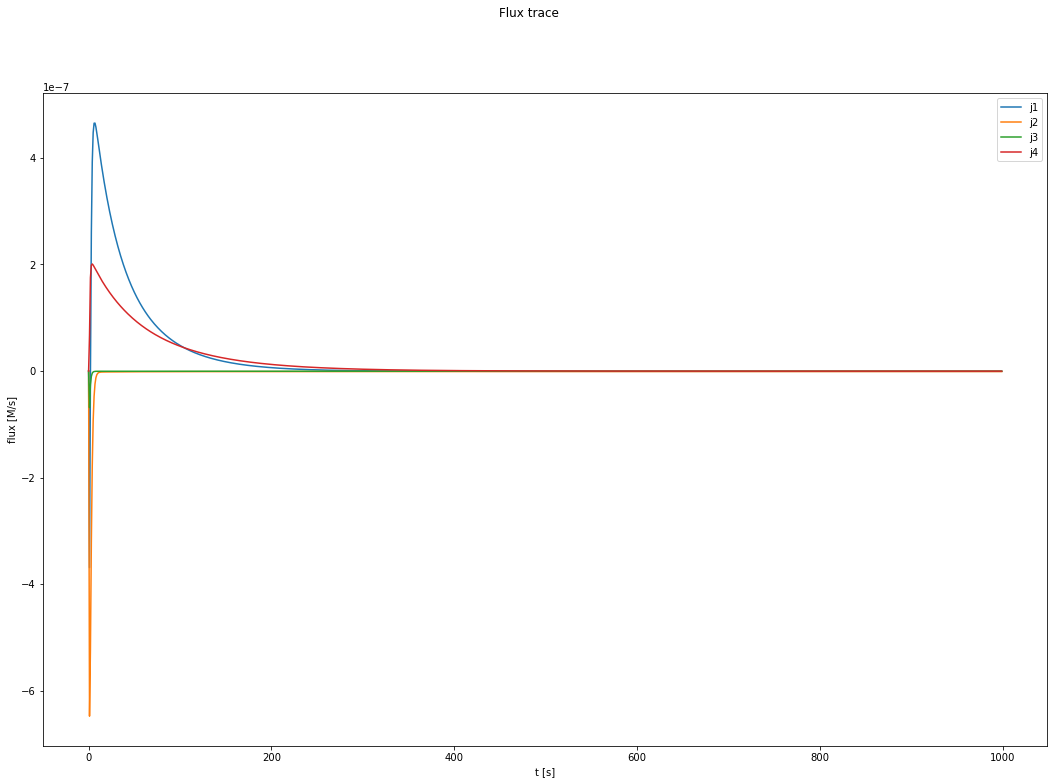

In [67]:
# simulation & analysis

j1 = sim1(p)
j2 = sim2(p)
j3 = sim3(p)
j4 = sim4(p)
x = [j1, j2, j3, j4]

labels = ['j1', 'j2', 'j3', 'j4']
plot_flux(x, labels)